In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/Kaggle_API_Credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download Dogs-vs-Cats

 99% 800M/812M [00:03<00:00, 281MB/s]
100% 812M/812M [00:03<00:00, 272MB/s]


In [ ]:
! unzip Dogs-vs-Cats.zip

Archive:  Dogs-vs-Cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
! unzip train.zip
! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy as sp

In [ ]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
path = r"/content/train"
filenames = os.listdir(path)
filenames[:10]

['dog.1734.jpg',
 'dog.9489.jpg',
 'cat.1935.jpg',
 'dog.2430.jpg',
 'dog.8482.jpg',
 'dog.6720.jpg',
 'cat.47.jpg',
 'cat.3287.jpg',
 'cat.11721.jpg',
 'cat.7993.jpg']

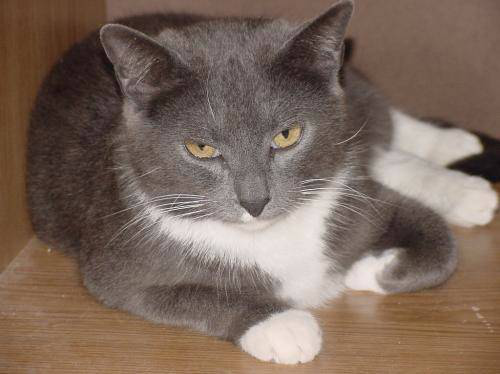

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
load_img(r"/content/train/cat.10045.jpg")

In [ ]:
label = []
for filename in filenames:
    if filename.split('.')[0] =='cat':
        label.append('cat')
    else:
        label.append('dog')

In [ ]:
df = pd.DataFrame({'name':filenames,'label':label})
df.head(5)

,name,label
0,dog.1734.jpg,dog
1,dog.9489.jpg,dog
2,cat.1935.jpg,cat
3,dog.2430.jpg,dog
4,dog.8482.jpg,dog


In [ ]:
path1 = r"/content/test1"
filenames_test = os.listdir(path1)
filenames_test[:5]

['9225.jpg', '3391.jpg', '8535.jpg', '2010.jpg', '4771.jpg']

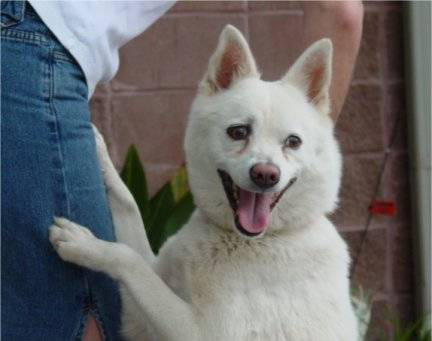

In [ ]:
load_img(r"/content/test1/66.jpg")

In [ ]:
train, test_val = train_test_split(df, test_size=0.2, stratify= df['label'], random_state=17)
test, val = train_test_split(test_val, test_size=0.5, stratify= test_val['label'], random_state=17 )

In [ ]:
aug_gen = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            horizontal_flip = True,
                            fill_mode='nearest'
                            )
train_data = aug_gen.flow_from_dataframe(train,
                                        directory=path,
                                        x_col='name',
                                        y_col='label',
                                        class_mode='binary',
                                        target_size=(224,224),
                                        seed=17
                                        )

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
val_gen = ImageDataGenerator(rescale=1./255)
val_data = val_gen.flow_from_dataframe(val,
                                     directory=path,
                                     x_col='name',
                                     y_col='label',
                                     class_mode='binary',
                                     target_size=(224,224),
                                     seed=17
                                     )

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
model= models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')

In [ ]:
history=model.fit(train_data, validation_data= val_data, epochs=15, callbacks=[EarlyStopping(monitor='val_acc', min_delta=0.001, patience=5, verbose=1)])

Epoch 1/15
625/625 [==============================] - 281s 425ms/step - loss: 0.7183 - acc: 0.5278 - val_loss: 0.6881 - val_acc: 0.5612
Epoch 2/15
625/625 [==============================] - 267s 427ms/step - loss: 0.6693 - acc: 0.6080 - val_loss: 0.6125 - val_acc: 0.6916
Epoch 3/15
625/625 [==============================] - 266s 425ms/step - loss: 0.6234 - acc: 0.6694 - val_loss: 0.5877 - val_acc: 0.7016
Epoch 4/15
625/625 [==============================] - 264s 422ms/step - loss: 0.5879 - acc: 0.7055 - val_loss: 0.5135 - val_acc: 0.7620
Epoch 5/15
625/625 [==============================] - 263s 421ms/step - loss: 0.5438 - acc: 0.7380 - val_loss: 0.4779 - val_acc: 0.7752
Epoch 6/15
625/625 [==============================] - 265s 424ms/step - loss: 0.5090 - acc: 0.7634 - val_loss: 0.4252 - val_acc: 0.8152
Epoch 7/15
625/625 [==============================] - 264s 423ms/step - loss: 0.4788 - acc: 0.7860 - val_loss: 0.4027 - val_acc: 0.8324
Epoch 8/15
625/625 [============================

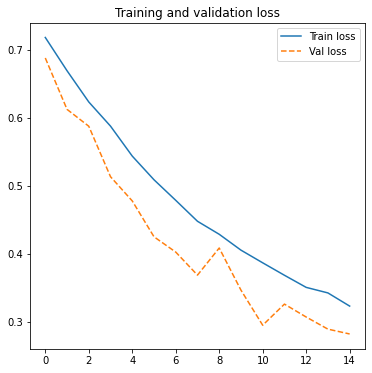

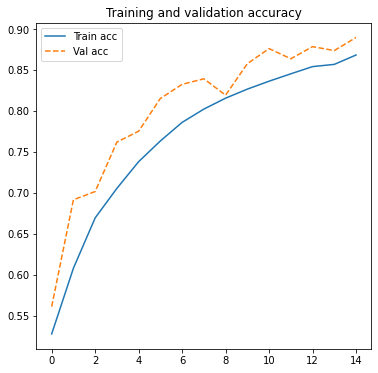

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(6,6))
plt.plot(loss, label='Train loss')
plt.plot(val_loss,'--', label='Val loss')
plt.title('Training and validation loss')
plt.legend();

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(6,6))
plt.plot(acc, label='Train acc')
plt.plot(val_acc,'--', label='Val acc')
plt.title('Training and validation accuracy')
plt.legend();